# 1. Load and Preprocess the Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dtaset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  # only for optional evaluatinn




In [ ]:
# Check for missing values
print(X.isnull().sum())

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


# 2. Exploratory Data Analysis (EDA)

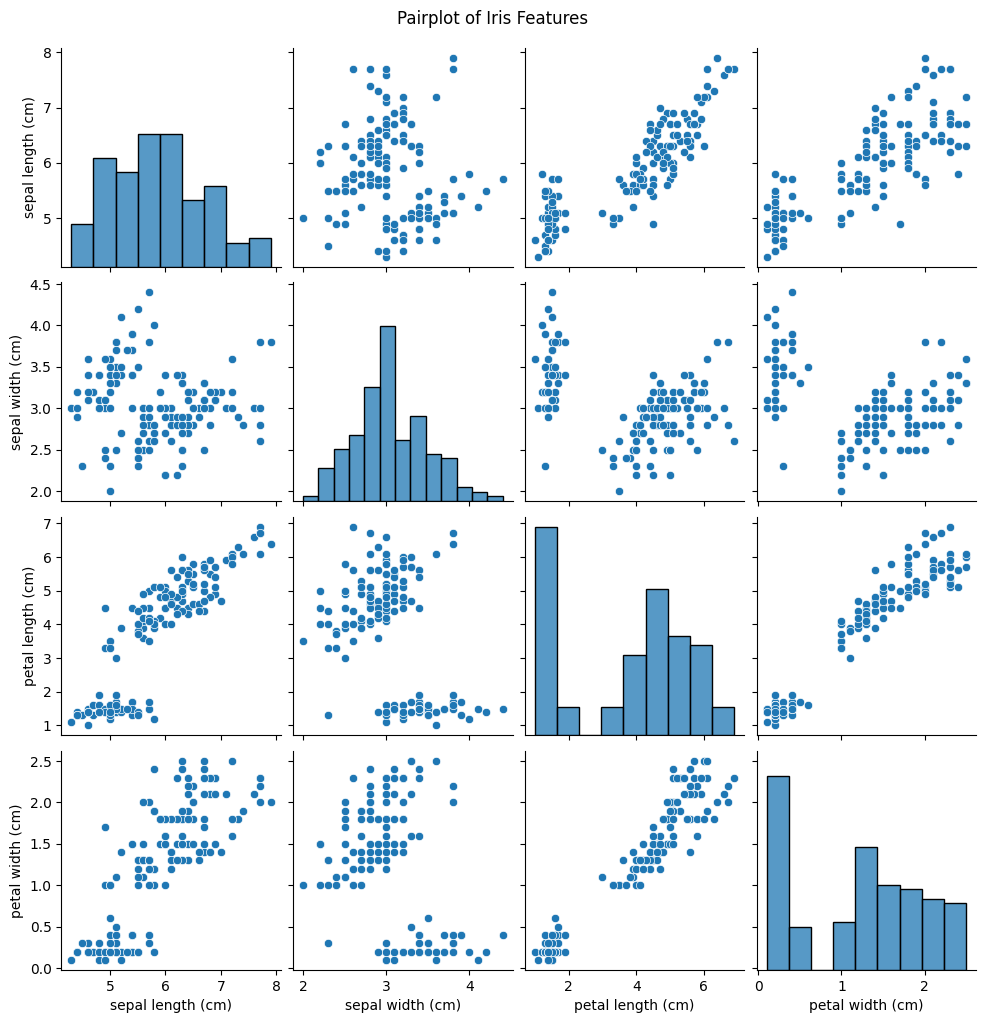

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert scaled data back to DataFrame for plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Pairplot (only on original data for easier interpretation)
sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names))
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

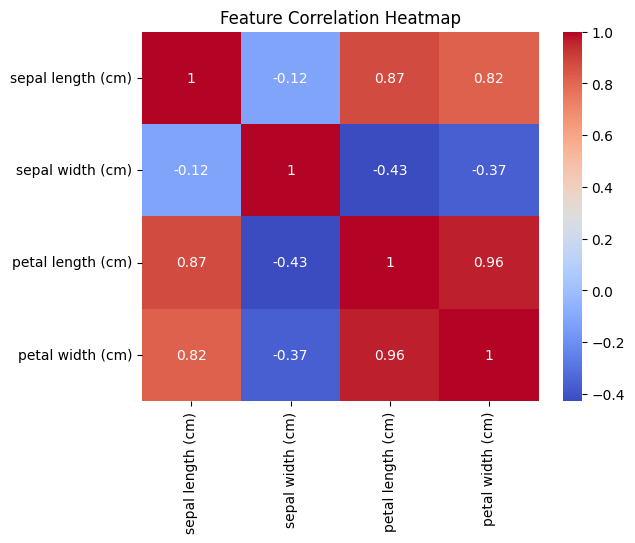

In [ ]:
# Heatmap of correlations
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Clustering Algorithms

# A. K-Means Clustering

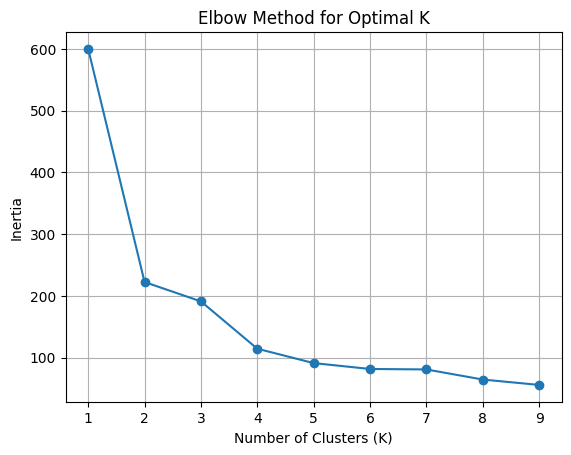

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use Elbow method to find optimal k
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


Fit and visualize K-Means

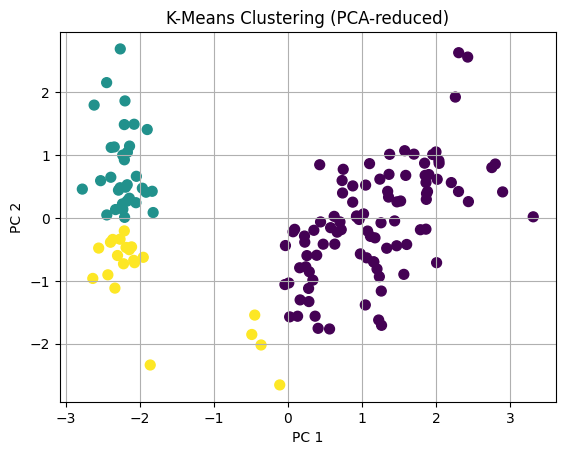

In [ ]:
# Choose optimal K (e.g., K=3 based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering (PCA-reduced)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


B. Hierarchical Clustering

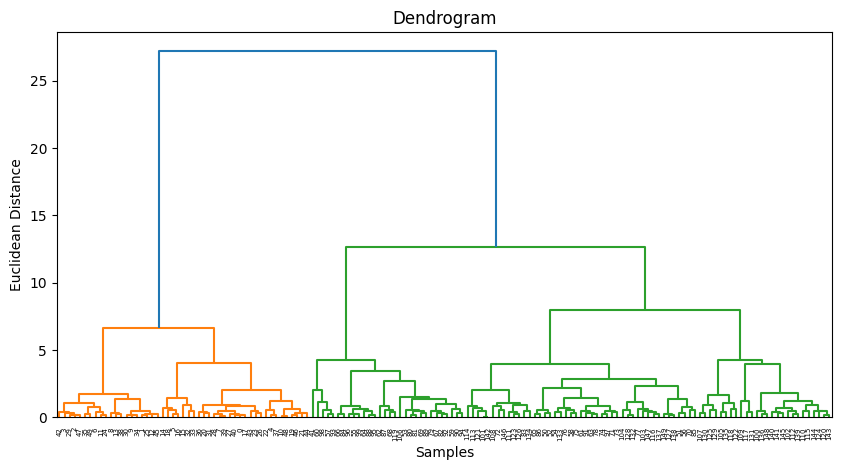

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

Fit Hierarchical clustering

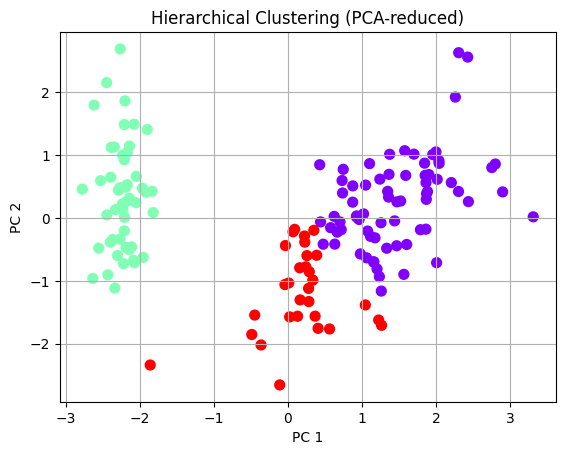

In [ ]:
# Fit Hierarchical clustering (e.g., 3 clusters)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering (PCA-reduced)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


# C. DBSCAN Clustering

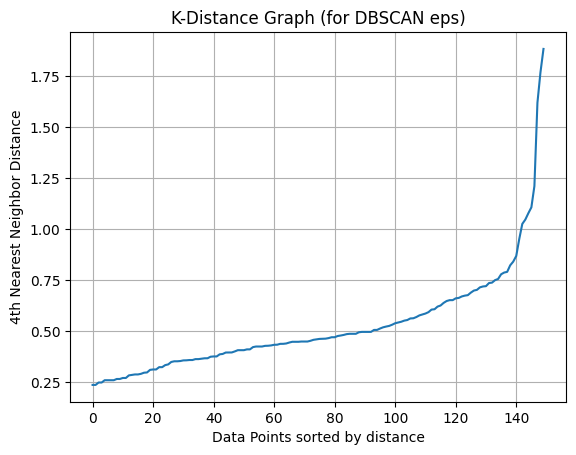

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use k-distance graph to find optimal eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot distances
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("K-Distance Graph (for DBSCAN eps)")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


Fit and visualize DBSCAN

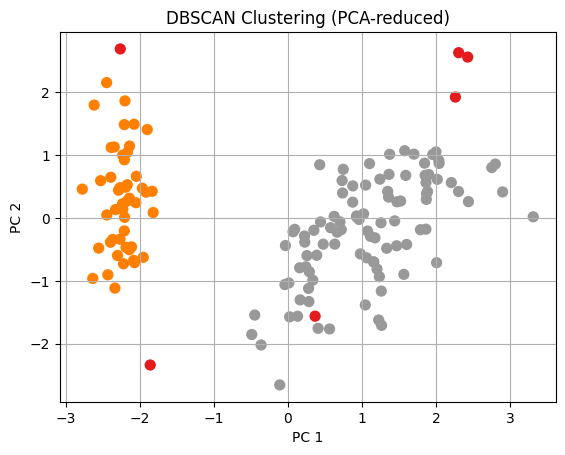

In [ ]:
# Set eps based on the graph
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set1', s=50)
plt.title("DBSCAN Clustering (PCA-reduced)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


# 4. Evaluation

Adjusted Rand Index (KMeans): 0.432804702527474


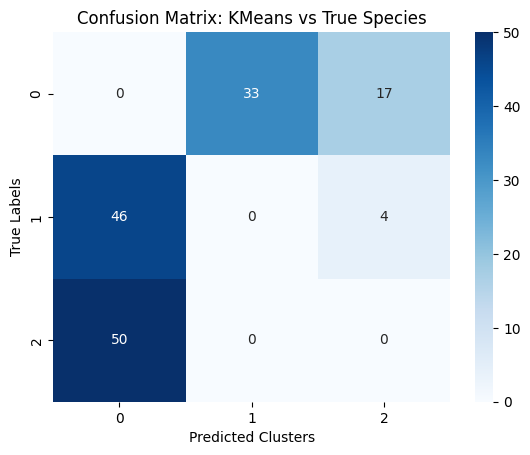

In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns

# KMeans vs actual
print("Adjusted Rand Index (KMeans):", adjusted_rand_score(y_true, kmeans_labels))

# Confusion matrix (may need to match cluster labels manually)
cm = confusion_matrix(y_true, kmeans_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: KMeans vs True Species")
plt.show()
